### 1. 환경 설정
- Jupyter Notebook, Python 3.x 이상
- 컴퓨터 비전을 쉽게 할 수 있도록 기능을 지원하는 라이브러리(사진, 영상을 다룰 때 유용)
- 컴퓨터 비전이란 사람이 시각정보를 입력값으로 하여 행동하기 이전에 생각하고 판단하는 부분을 컴퓨터가 대신하도록 하는 학문, 시각적인 입력 데이턱를 주로 다룬다.
- 영상처리, 3D 구성, 추적, 기계학습, 인식, 딥러닝까지 유용한 기능이 많다. 상업적인 사용도 무료로 가능

In [2]:
# 설치 코드
#!pip install opencv-python # 기본 번들
#!pip install opencv-python-headless # 경량화 opencv

# 추가 번들 설치 지원
%pip install opencv-contrib-python 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 설치 확인
import cv2
cv2.__version__

'4.11.0'

In [4]:
# 이미지 출력
import cv2
# cv2.imread(파일의 경로와 이름.확장자)
img=cv2.imread('./data/pets.jpg')
# opencv에서 제공하는 이미지 출력 기능
cv2.imshow('img', img)
cv2.waitKey(0) # 키를 입력받길 대기하겠다. -> 0 : 무한 대기
cv2.destroyAllWindows() # 모든 창을 닫기

- 읽기 옵션
    - 1. cv2.IMREAD_COLOR : 컬러 이미지로 불러오기, 투명영역은 무시(기본값)
      2. cv2.IMREAD_GRAYSCALE : 흑백 이미지로 불러오기
      3. cv2.IMREAD_UNCHANGED : 투명 영역까지 포함

In [5]:
# 이미지 출력
import cv2
# cv2.imread(파일의 경로와 이름.확장자)
img_color=cv2.imread('./data/pets.jpg', cv2.IMREAD_COLOR)
img_gray=cv2.imread('./data/pets.jpg', cv2.IMREAD_GRAYSCALE)
img_unchange=cv2.imread('./data/pets.jpg', cv2.IMREAD_UNCHANGED)
# opencv에서 제공하는 이미지 출력 기능
cv2.imshow('img_color', img_color)
cv2.imshow('img_gray', img_gray)
cv2.imshow('img_unchange', img_unchange)
cv2.waitKey(0) # 키를 입력받길 대기하겠다. -> 0 : 무한 대기
cv2.destroyAllWindows() # 모든 창을 닫기

In [6]:
# 이미지  정보 확인하기
print('color : ', img_color.shape)
print('gray : ', img_gray.shape)
print('unchange : ', img_unchange.shape)

color :  (427, 640, 3)
gray :  (427, 640)
unchange :  (427, 640, 3)


In [7]:
# 이미지 색상 변환
# cv2.cvtColor()
img_color=cv2.imread('./data/pets.jpg', cv2.IMREAD_COLOR)
img_gray=cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# 여기서 2는 to와 같다
cv2.imshow('img_color', img_color)
cv2.imshow('img_gray', img_gray)
cv2.waitKey(0) # 키를 입력받길 대기하겠다. -> 0 : 무한 대기
cv2.destroyAllWindows() # 모든 창을 닫기

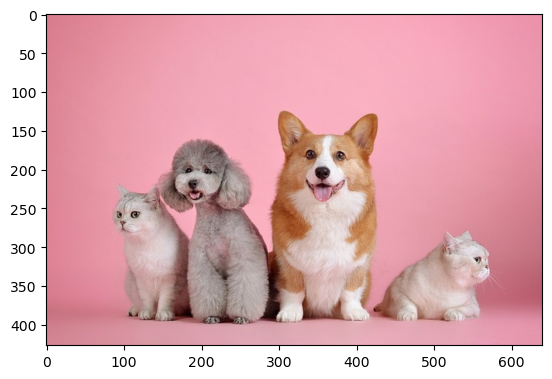

In [8]:
# matplotlib을 이용해서 이미지 출력
import cv2
from matplotlib import pyplot as plt

img_color=cv2.imread('./data/pets.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

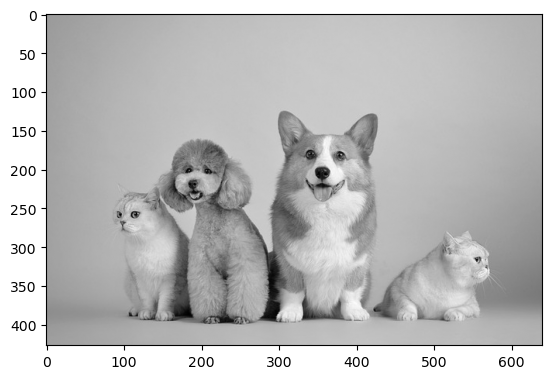

In [9]:
# 흑백 출력
import cv2
from matplotlib import pyplot as plt

img_color=cv2.imread('./data/pets.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

### 2. 색상 공간 변환
- 시각은 색상정보에 대해 잘못된 정보를 보내주는 경우가 많음
- 밤에 색상을 보면 정확핝 색상을 판단하기 어렵다. - 명도가 높아진 상태(색에 검정색이 섞임)
- 색상에 밝은 빛을 강하게 비추는 경우 정확한 색상을 보여주지 못함 - 채도가 높아진 상태(색에 흰색이 섞임)
- 컬러는 너무 많은 정보를 가지고 있기 때문에 연산량이 많고 잘못된 정보를 보낼 수 있다. - 실시간 처리가 어려움
- 그래서 이를 해결하기 위해 Gray(회색인데, 여기서는 흑백) 이미지나 binary 이미지를 이용
- Gray 이미지 : 흑백 이미지 / 픽셀의 범위 0 ~ 255 사이의 값을 가짐
- binary 이미지 : 0 또는 255 값만 가지고 있는 이미지
    - 특정 패턴이나 물체의 윤관을 감지
    - 배경과 물체 구별
    - 텍스트 필터링
    - 뼈의 윤곽 또는 MRI 스캔 등 종양 식별
    - 자율 주행 장애물 또는 차선 감지
    - 제품 결함 및 불량품 식별시 사용

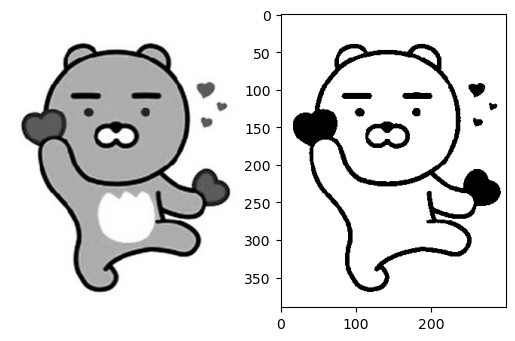

In [10]:
# 이진 이미지 구성
import cv2
from matplotlib import pyplot as plt
# 주의점
# 이미지 이진화를 진행할 때는 흑백 이미지 데이터를 활용
# 컬러 이미지를 이진화 진행할 때는 흑백 이미지 변환 후 이진화를 진행해야 함
img = cv2.imread('./data/ryan.jpg', cv2.IMREAD_GRAYSCALE)

# cv2.threshold(대상, 임계값(기준값), 변환할 값, 이진화 종류)
_, thr_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# plt.subplot()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(thr_img, cmap='gray')
plt.show()

- 다음 시간 수업 내용
- 이진화 방법에 대한 내용 정리
- 자동으로 문턱값을 찾아주는 오츠 알고리즘 부터

### 3. 이진 이미지 구성
- 0 또는 1(255)로 표시되는 이미지 데이터 구성
- threshold(img, threshold_value, value, flag)
- img : GrayScale(흑백 이미지)
- threshold_value : 기준값(임계값) -> 0 또는 255로 나누기 위한 기준값
- value : 임계값보다 클 때 적요되는 값
- flag : 임계값 적용 방법
    - cv2.THRESH_BINARY : 임계값을 기준으로 실제 픽셀값이 크면 value, 아니면 0을 할당
    - cv2.THRESH_BINARY_INV : 임계값을 기준으로 실제 픽셀값이 크면 0, 아니면 value를 할당(cv2.THRESH_BINARY와 정반대)
    - cv2.THRESH_TRUNC : 임계값을 기준으로 실제 픽셀 값이 크면 모두 임계값, 아니면 픽셀은 기존값을 사용(이미지 밝기 조정, 밝은 영역의 명도(어두움)를 높여서 세부정보가 잘 드러나도록 만들어주는 역할)

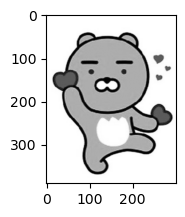

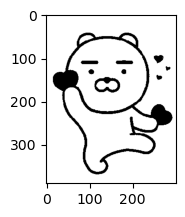

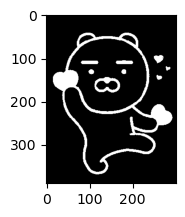

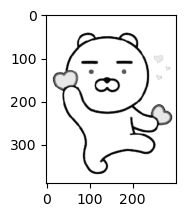

In [11]:
# 이진 이미지 구성
import cv2
from matplotlib import pyplot as plt
# 주의점
# 이미지 이진화를 진행할 때는 흑백 이미지 데이터를 활용
# 컬러 이미지를 이진화 진행할 때는 흑백 이미지 변환 후 이진화를 진행해야 함
img = cv2.imread('./data/ryan.jpg', cv2.IMREAD_GRAYSCALE)

# cv2.threshold(대상, 임계값(기준값), 변환할 값, 이진화 종류)
_, thr_img1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
_, thr_img2 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
_, thr_img3 = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC)

# 흑백 이미지
plt.subplot(2,2,1) 
plt.imshow(img, cmap='gray')
plt.show()
# BINARY 이미지\
plt.subplot(2,2,1) 
plt.imshow(thr_img1, cmap='gray')
plt.show()
# BINARY_INV 이미지
plt.subplot(2,2,1) 
plt.imshow(thr_img2, cmap='gray')
plt.show()
# TRUNC 이미지
plt.subplot(2,2,1) 
plt.imshow(thr_img3, cmap='gray')
plt.show()

In [12]:
img.size

117000

In [13]:
# 히스토그램 이용
# 픽셀의 도수를 이용하는 방법
img.reshape(-1).shape


(117000,)

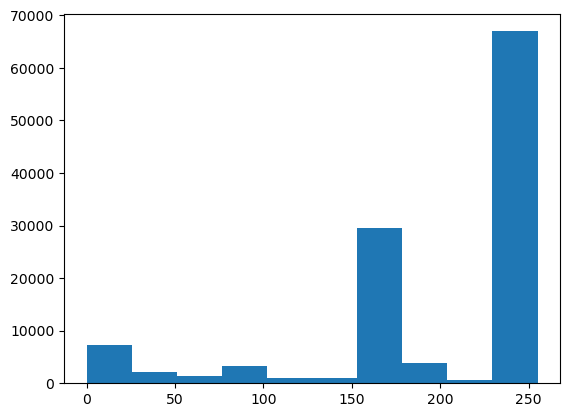

In [14]:
plt.hist(img.reshape(-1))
plt.show()

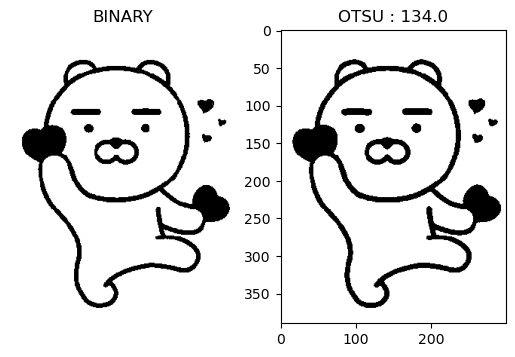

In [ ]:
img = cv2.imread('./data/ryan.jpg', cv2.IMREAD_GRAYSCALE)

# cv2.threshold(대상, 임계값(기준값), 변환할 값, 이진화 종류)
_, thr_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# 오츠 알고리즘에 의해 자동으로 임계값을 찾아주므로 -1이라는 것을 넣어준 것임. 다른 값으로 바꿔도 결과는 같음.
th_val, thr_img2 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# plt.subplot()
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('BINARY')
plt.imshow(thr_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f"OTSU : {th_val}")
plt.imshow(thr_img2, cmap='gray')
plt.show()

### 4. 이진화를 이용해서 특정 영역만 값을 변환

#### 4-1. apple 이미지 불러오기

In [19]:
apple = cv2.imread('./data/apple.jpg', cv2.IMREAD_GRAYSCALE)

#### 4-2. 이미지 사이즈 확인

In [26]:
h, w = apple.shape

# x축 => 넓이, y축 => 높이
# 위랑 다르므로 주의!
center_x, center_y = w // 2, h // 2

In [27]:
rect_w, rect_h = center_x // 2, center_y // 2

#### 4-3. 사각형 영역 추출 -> 좌표 추출
- 사각형을 그리기 위해서 -> 좌상산 좌표  & 우하단 좌표가 필요

In [28]:
top_left_x = center_x - rect_w
top_left_y = center_y - rect_h
bottom_right_x = center_x + rect_w
bottom_right_y = center_y + rect_h

#### 4-4. 사각형 영역 추출 - 이미지 Slicing

In [29]:
rect_region = apple[top_left_y : bottom_right_y, top_left_x : bottom_right_x]
rect_region.shape

(306, 306)

#### 4-5. 사각형 영역에 이진화 진행

In [30]:
val, apple_bin = cv2.threshold(rect_region, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#### 4-6. 원본 이미지에 이진화 변형 이미지 대입

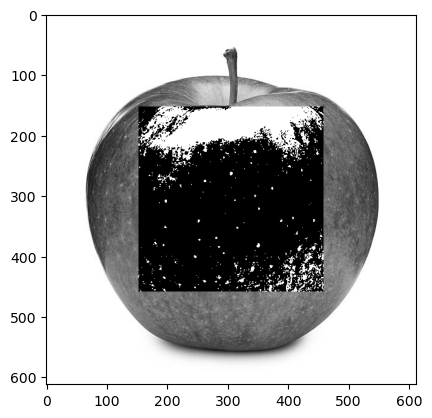

In [31]:
# 원본 유지
apple2 = apple.copy()

apple[top_left_y : bottom_right_y, top_left_x : bottom_right_x] = apple_bin

plt.imshow(apple, cmap = 'gray')
plt.show()

In [32]:
apple_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
apple2[top_left_y : bottom_right_y, top_left_x : bottom_right_x]

array([[ 75,  62,  55, ..., 104, 120, 126],
       [ 68,  59,  60, ..., 107, 116, 120],
       [ 69,  75,  83, ..., 126, 118, 110],
       ...,
       [131, 120, 121, ..., 104, 117, 131],
       [132, 120, 123, ..., 119, 126, 131],
       [127, 117, 123, ..., 129, 130, 126]], dtype=uint8)

### 5. OCR(광학 문자 인식)
- 텍스트가 담긴 이미지를 기계가 읽을 수 있는 텍스트 포맷으로 변환하는 과정
- 이미지 -> 텍스트
- OCR 기능을 구현한 라이브러리를 주로 사용했던 pytesseract

In [2]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pytesseract as pyt

#### 5-1. 이미지 컬럼 형태로 읽어오기

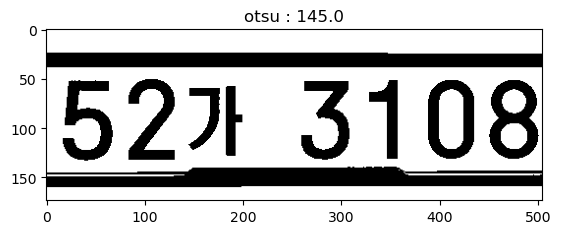

In [7]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./data/car.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, img_car = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_car_crop = img_car[ : , 100 : 605]

plt.title(f'otsu : {val}')
plt.imshow(img_car_crop, cmap = 'gray')
plt.show()

### 6. 이미지 블렌딩
- 이미지를 중첩시켜서 하나로 합치는 작업

#### 6-1. 이미지 로딩

In [8]:
img1 = cv2.imread('./data/ryan.jpg')
img2 = cv2.imread('./data/apple.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#### 6-2. 이미지 크기 변경
- 이미지의 사이즈가 동일해야 블렌딩 가능

In [10]:
img1 = cv2.resize(img1, dsize = (300 ,300))
img2 = cv2.resize(img2, dsize = (300 ,300))

In [11]:
result = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

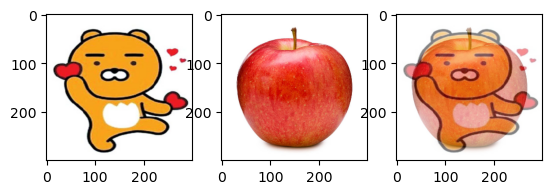

In [12]:
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(result)